# **Business Understanding**

# **Project Domain**
Project yang saya buat ini ada pada domain Kesehatan dan Kebugaran badan
seseorang. Yang mana fokus pada estimasi kadar lemak tubuh seseorang menggunakan data antropometri (pengukuran tubuh) seperti berat badan, tinggi badan, lingkar leher, perut, paha, lengan, dan sebagainya. Estimasi ini diharapkan bermanfaat untuk individu yang ingin check kondisi badannya.

# **Problem Statement**
Mengetahui kadar lemak tubuh seseorang secara akurat itu biasanya membutuhkan alat khusus yang mahal atau memeriksakan diri ke ahlinya (dokter). Namun, tidak semua orang punya atau memiliki akses untuk memeriksakan diri menggunakan alat khusus ataupun ke dokter karena terkendala biaya. Lalu, bagaimana cara kita untuk mengetahui dan memprediksi kadar lemak tubuh yang hanya dengan data?

# **Goals**
Goals dari project ini adalah untuk membuat model ML berbasis ANN yang dapat memperkirakan atau memprediksi kadar lemak tubuh seseorang hanya berdasarkan data pengukuran dari fisik mereka, seperti berat badan, tinggi badan, dan lain-lainnya

# **Solution Statement**
Solusi dari project yang ditawarkan adalah membangun model prediksi menggunakan ANN, dengan data pengukuran tubuh/fisik sebagai input dan kadar lemak tubuhnya sebagai output. Model ini nantinya akan dapat diintegrasikan ke dalam aplikasi sederhana berbasis web (Menggunakan Streamlit), sehingga user yang ingin mencoba bisa meng-input datanya sendiri dan mendapatkan estimasi kadar lemak tubuh mereka

# **Data Understanding**

# **Import Data dari Kaggle**

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"riskadewiyuliyanti","key":"3faa2cfdde5caf0a6d12ffd580e3fd90"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [11]:
!kaggle datasets download -d fedesoriano/body-fat-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset
License(s): copyright-authors


In [12]:
!mkdir body-fat-prediction-dataset
!unzip body-fat-prediction-dataset.zip -d body-fat-prediction-dataset
!ls body-fat-prediction-dataset

Archive:  body-fat-prediction-dataset.zip
  inflating: body-fat-prediction-dataset/bodyfat.csv  
bodyfat.csv


# **Import Library**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
df = pd.read_csv("body-fat-prediction-dataset/bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [21]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794 

# **Exploratory Data Analysis**

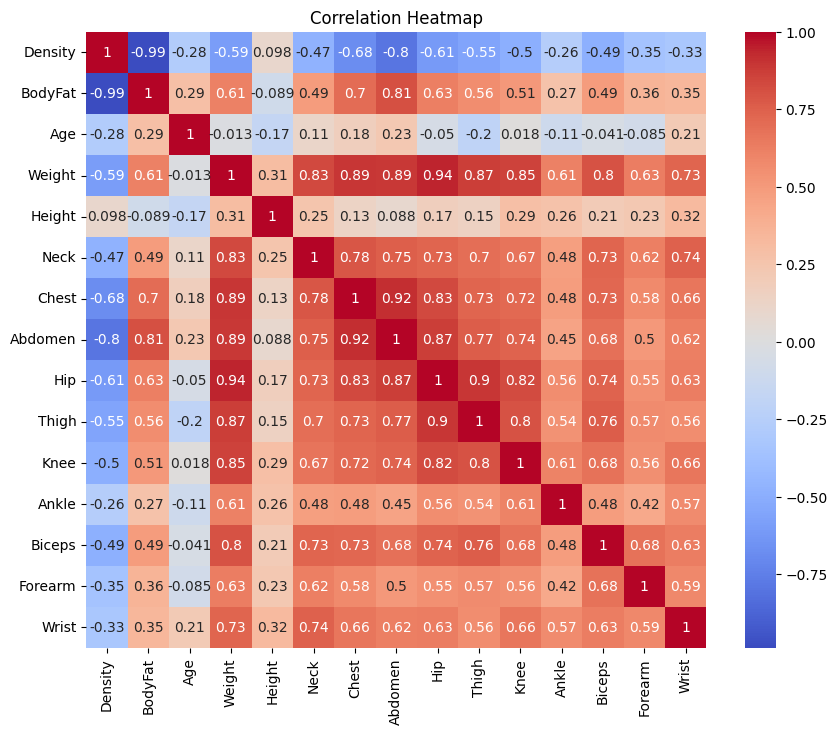

In [23]:
#Korelasi antar Fitur (Heatmap)
#Untuk melihat hubungan antar variable, terutama mana yang paling berkorelasi dengan bodyfat

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Frequency')

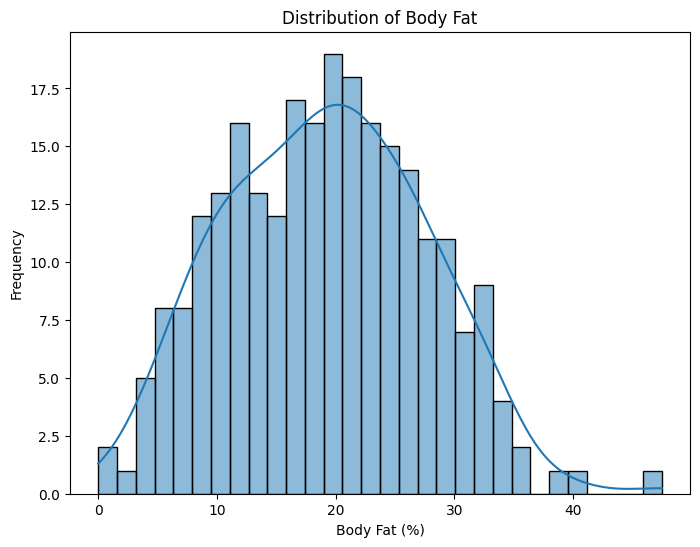

In [24]:
#2. Distribusi Bodyfat menggunakan Histogram
#Untuk melihat sebaran bodyfat

plt.figure(figsize=(8, 6))
sns.histplot(df['BodyFat'], kde=True, bins=30)
plt.title('Distribution of Body Fat')
plt.xlabel('Body Fat (%)')
plt.ylabel('Frequency')

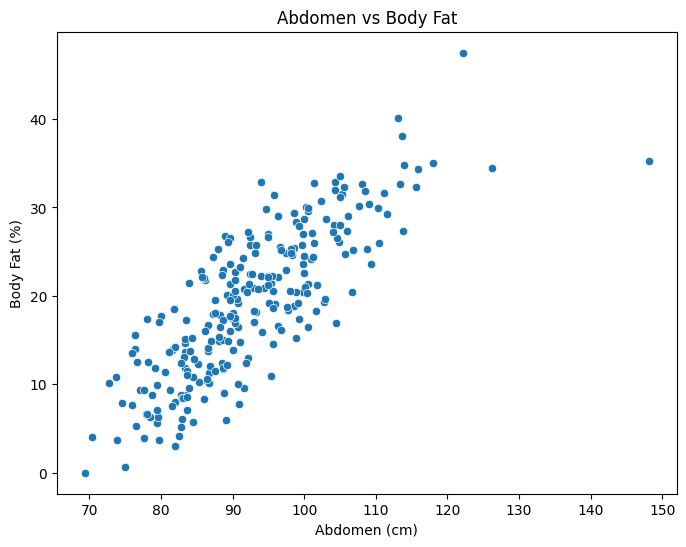

In [25]:
#3. Scatterplot Abdomen vs Bodyfat
# Pakai abdomen karna berkorelasi dengan bodyfat

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Abdomen', y='BodyFat', data=df)
plt.title('Abdomen vs Body Fat')
plt.xlabel('Abdomen (cm)')
plt.ylabel('Body Fat (%)')
plt.show()

<ipython-input-27-6463b6ee9520>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='BodyFat', data=df, palette='Set2')


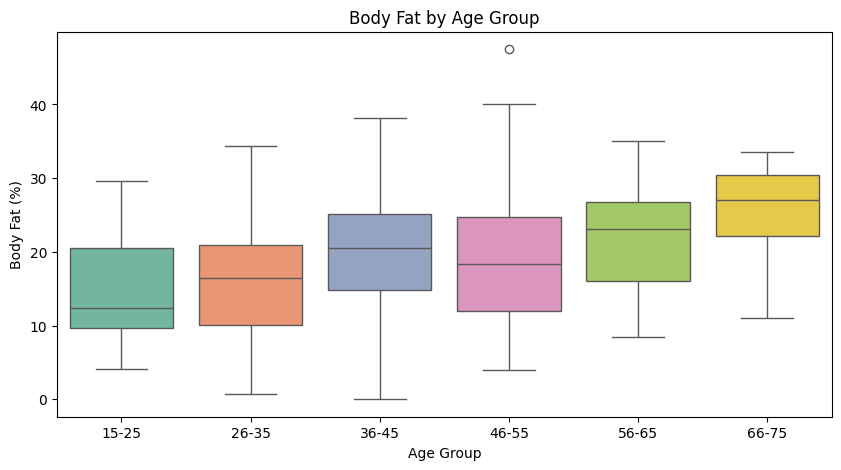

In [27]:
#4. Boxplot BodyFat berdasarkan kelompok umur (Age bins)
# Melihat kategori umur berdasarkan bodyfat

df['AgeGroup'] = pd.cut(df['Age'], bins=[15,25,35,45,55,65,75], labels=["15-25","26-35","36-45","46-55","56-65","66-75"])

plt.figure(figsize=(10,5))
sns.boxplot(x='AgeGroup', y='BodyFat', data=df, palette='Set2')
plt.title("Body Fat by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Body Fat (%)")
plt.show()

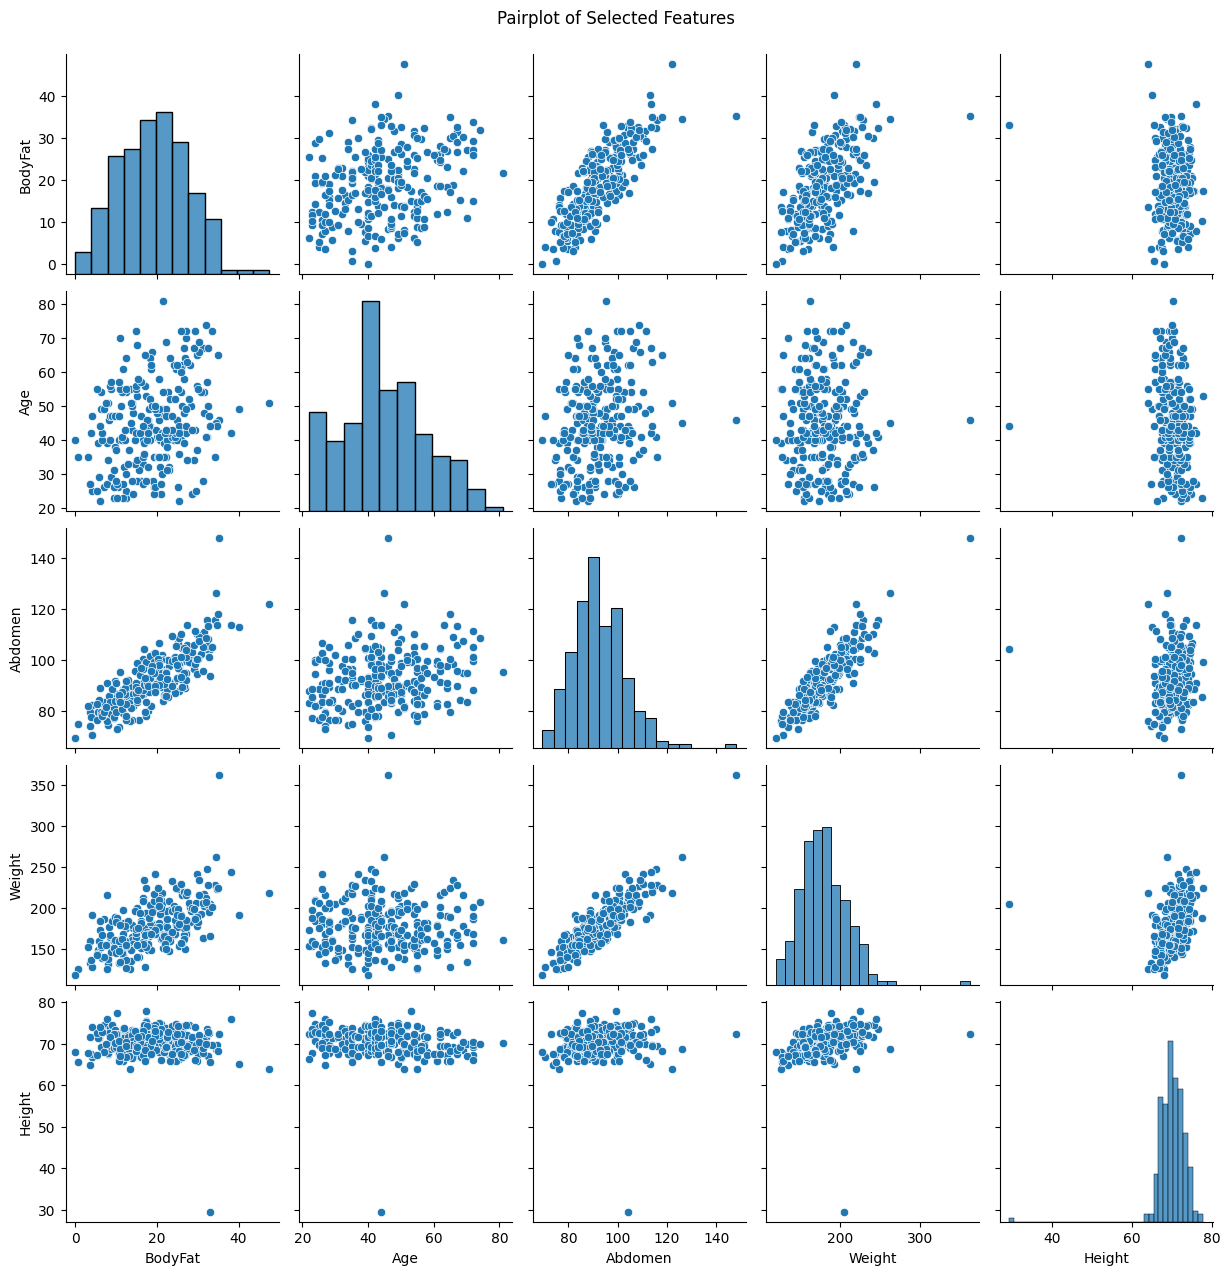

In [29]:
#5. Pairplot beberapa fitur utama
#Untuk melihat hubungan visual dari fitur-fitur penting sekaligus

selected_features = ['BodyFat', 'Age', 'Abdomen', 'Weight', 'Height']
sns.pairplot(df[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# **Data Preparation**

In [32]:
if "AgeGroup" in df.columns:
    df.drop("AgeGroup", axis=1, inplace=True)

In [33]:
print(df.isnull().sum())

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [35]:
# Pisah fitur dan label
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']

In [36]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
#Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Modelling ANN**

In [41]:
#Membangun model ANN
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
#Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

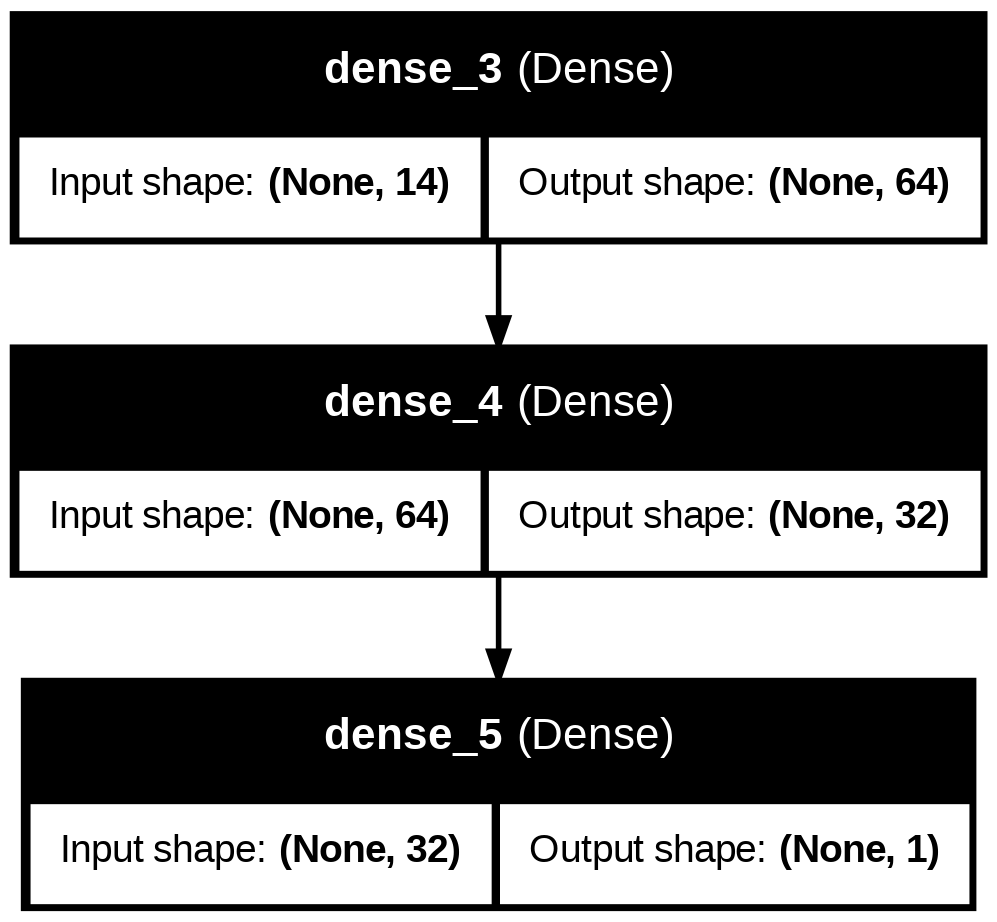

In [43]:
#Plot arsitektur model
plot_model(model, show_shapes=True, show_layer_names=True)

In [45]:
#Training model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1261 - val_loss: 0.4045
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1641 - val_loss: 0.3879
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1401 - val_loss: 0.3927
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1614 - val_loss: 0.4051
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1122 - val_loss: 0.4139
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0737 - val_loss: 0.4197
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0571 - val_loss: 0.4194
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0983 - val_loss: 0.4196
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0793 - val_loss: 0.4215
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0630 - val_loss: 0.4245
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1003 - val_loss: 0.4253
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1065 - val_lo

# **Evaluasi Model**

In [48]:
#Prediksi model
y_pred = model.predict(X_test).flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [49]:
#Evaluasi
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9529764383981102
MAE: 0.7225281977186017
MSE: 2.187445328980488


# **Deployment (Model Simulation & Save Model)**

In [50]:
# Simpan model ke .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('bodyfat_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpsu0yjd7s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 14), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136905823118032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905658552720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905658548304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905658554256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905658552144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905658563856: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [51]:
# Label encoder dummy (meskipun regresi, agar sesuai ketentuan)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
joblib.dump(le, 'labelencoder.pkl')  # Dummy encoder

# Dataset bisa disimpan juga
df.to_csv('bodyfat_clean.csv', index=False)